Code to demonstrate fastcda stability analysis which does multiple resampling without replacement of a dataset, searchs for a model.  The edges that reach a specified proportion are considered **stable** edges.

In [1]:
# import needed packages
from fastcda import FastCDA
from dgraph_flex import DgraphFlex
import semopy
import pprint as pp

In [2]:
# create  an instance of FastCDA
fc = FastCDA()

In [3]:
# read in the sample ema dataset and view it
df = fc.getSampleData('R34B23.csv')
df

,PainIntensity,PainControl,PainConcerned,PainAffectFunc,PainFearfulMove,P_Active,P_Determined,P_Attentive,P_Inspired,P_Alert,...,P_Ashamed_,ControlLife_,BodyEnergy_,BodyRelax_,MindRelax_,SpatialSpan3_,SpatialSpan4_,SpatialSpan5_,GridA_secs_,GridB_secs_
0,-0.359945,0.737816,0.904106,0.764228,0.744378,0.555172,-0.527621,-0.685969,-0.318714,-0.684565,...,0.0,3.212720,-0.270696,1.092218,0.844551,-3.463424,0.24577,0.533287,2.554167,2.885596
1,0.176577,0.737816,-0.599565,-2.499232,-0.763464,-0.339901,-0.527621,0.308371,-1.202168,-0.684565,...,0.0,0.244242,-0.270696,1.092218,0.844551,0.196917,0.24577,-2.322964,0.281909,0.992570
2,-1.432989,0.737816,-0.599565,-2.499232,-0.763464,0.555172,0.378511,0.308371,-0.318714,0.298719,...,0.0,0.244242,-1.367363,1.092218,0.844551,0.196917,0.24577,0.533287,0.057766,0.375397
3,2.322664,-2.370849,0.904106,-0.867502,0.744378,1.450245,1.284644,1.302712,1.448193,1.282003,...,0.0,0.244242,-0.270696,1.092218,0.844551,0.196917,0.24577,0.533287,-0.140817,0.410647
4,1.249621,0.737816,-0.599565,-0.867502,0.744378,-1.234974,-0.527621,0.308371,-1.202168,0.298719,...,0.0,0.244242,0.825971,-1.832705,-0.503318,0.196917,0.24577,0.533287,11.350958,10.770098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,-0.896467,0.737816,0.904106,0.764228,-0.763464,1.450245,2.190776,1.302712,2.331647,1.282003,...,0.0,0.244242,-0.270696,1.092218,0.844551,0.196917,0.24577,-0.180775,-0.275919,-0.571634
154,-0.896467,-0.816516,-0.599565,0.764228,-0.763464,0.555172,1.284644,1.302712,1.448193,1.282003,...,0.0,0.244242,1.922638,-0.370243,-0.503318,0.196917,0.24577,0.533287,-0.065920,-0.265400
155,0.713099,-0.816516,0.904106,0.764228,-0.763464,-1.234974,-1.433754,-1.680309,-1.202168,-0.684565,...,0.0,0.244242,0.825971,-1.832705,-1.851188,0.196917,0.24577,0.533287,-0.265247,-0.272460
156,-1.432989,0.737816,0.904106,0.764228,-2.271307,1.450245,1.284644,1.302712,1.448193,1.282003,...,0.0,0.244242,-1.367363,-1.832705,-1.851188,0.196917,0.24577,0.533287,-0.006956,-0.226009


In [4]:
# create the prior knowledge
knowledge = fc.create_lag_knowledge(df.columns, lag_stub = '_')


In [5]:
# Run the search
SearchResult, graph = fc.run_model_search( df, 
                                    model='gfci', 
                                    knowledge=knowledge, 
                                    score={'sem_bic': {'penalty_discount': 1.0}},
                                    test={'fisher_z': {'alpha': .01}})


Singularity encountered when scoring PainIntensity | P_Ashamed
Singularity encountered when scoring PainIntensity | P_Ashamed_
Singularity encountered when scoring PainControl | P_Ashamed
Singularity encountered when scoring PainControl | P_Ashamed_
Singularity encountered when scoring PainConcerned | P_Ashamed
Singularity encountered when scoring PainConcerned | P_Ashamed_
Singularity encountered when scoring PainAffectFunc | P_Ashamed
Singularity encountered when scoring PainAffectFunc | P_Ashamed_
Singularity encountered when scoring PainFearfulMove | P_Ashamed
Singularity encountered when scoring PainFearfulMove | P_Ashamed_
Singularity encountered when scoring P_Active | P_Ashamed
Singularity encountered when scoring P_Active | P_Ashamed_
Singularity encountered when scoring P_Determined | P_Ashamed
Singularity encountered when scoring P_Determined | P_Ashamed_
Singularity encountered when scoring P_Attentive | P_Ashamed
Singularity encountered when scoring P_Attentive | P_Ashamed

In [6]:
# searchResult has multiple keys, the one we are generally interested in is 'edges'
print(f"Number of edges found: {len(SearchResult['edges'])} edges.")
SearchResult['edges']

Number of edges found: 57 edges.


['ControlLife_ --> P_Afraid',
 'P_Hostile --> P_Hostile_',
 'P_Hostile_ --> P_Afraid',
 'P_Determined --- P_Active',
 'P_upset --> ControlLife',
 'P_Attentive --- P_Alert',
 'PainConcerned_ <-> PainIntensity_',
 'P_Alert_ --> MindRelax_',
 'ControlLife_ --> P_Hostile',
 'PainIntensity <-> PainConcerned',
 'MindRelax o-o BodyRelax',
 'PainControl --> ControlLife',
 'PainAffectFunc --> PainControl_',
 'P_Nervous_ o-> SpatialSpan5',
 'P_Determined --- P_Attentive',
 'P_Inspired_ --- BodyEnergy_',
 'PainAffectFunc --> PainAffectFunc_',
 'PainConcerned --> PainAffectFunc',
 'P_Alert o-> ControlLife',
 'P_Determined_ --- P_Inspired_',
 'BodyRelax o-> GridA_secs_',
 'P_Hostile --> P_upset',
 'PainConcerned --> SpatialSpan3',
 'PainIntensity --> P_upset',
 'P_Alert --- P_Inspired',
 'BodyEnergy_ --- P_Active_',
 'PainControl_ <-> PainIntensity_',
 'P_Inspired --- BodyEnergy',
 'SpatialSpan3_ --> P_Hostile_',
 'PainFearfulMove --> PainFearfulMove_',
 'GridA_secs o-o GridB_secs',
 'PainAffectFun

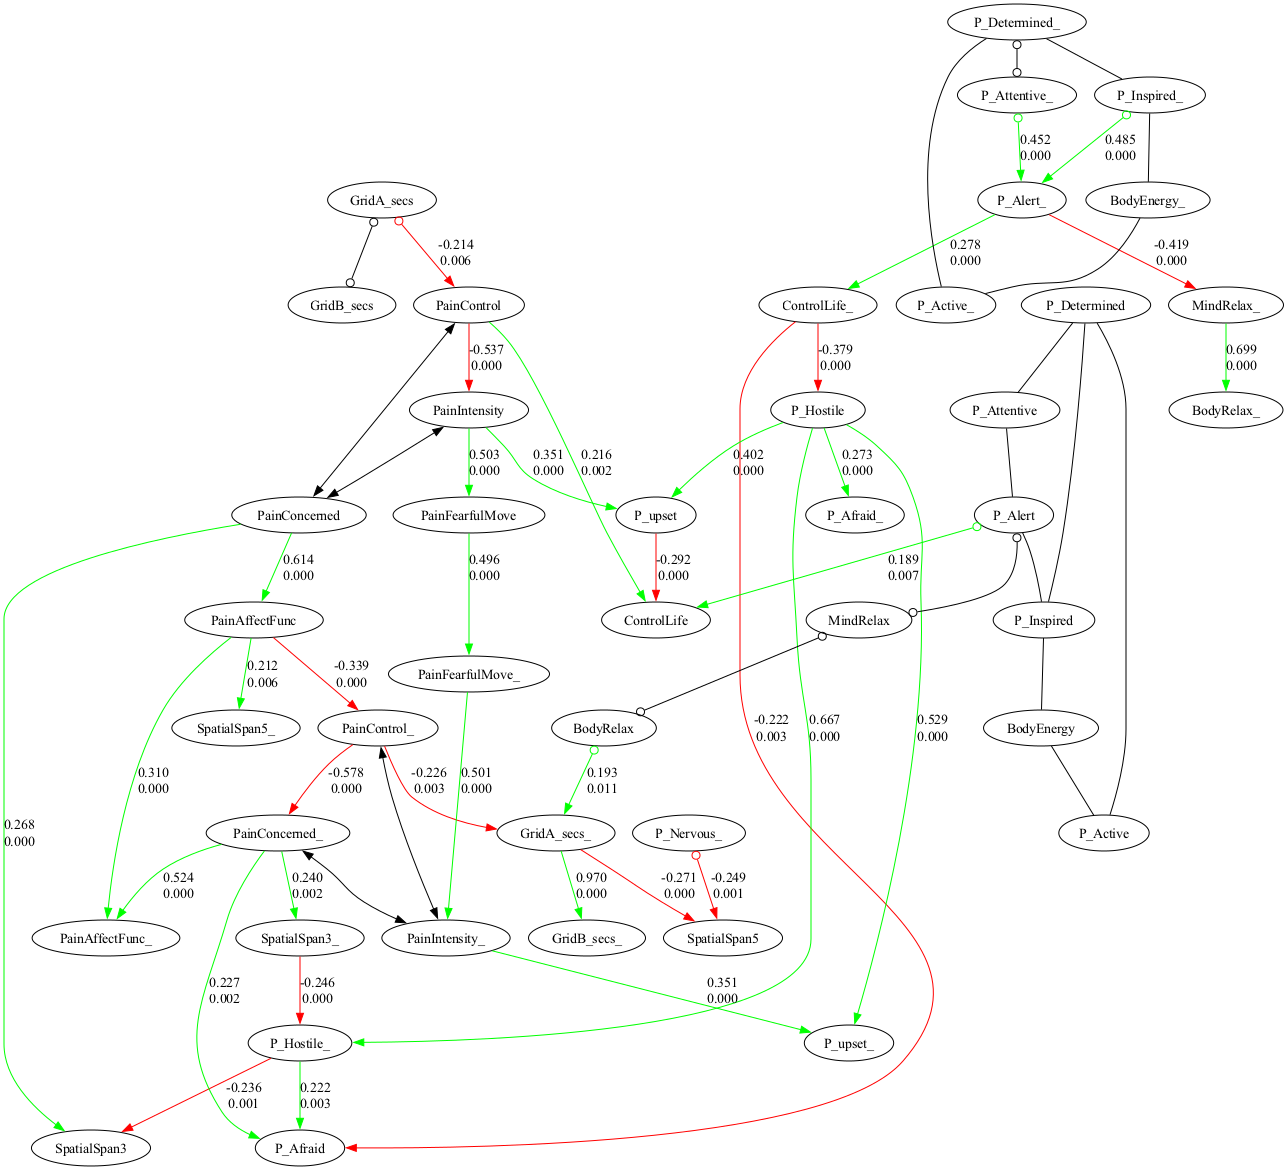

In [7]:
# Show the graph
graph.show_graph()

In the next section, we perform a stability analysis to determine which edges are most stable while resampling the data.

We do 100 runs using a subsample of 90% of the original data without substitution.

We keep edges that are present with at least a fraction of 0.75.

StabilityResult['edges'] contains the edges that were found 0.75 of the time.

A graph object is returned which includes the SEM results.

If the argument "lag_stub" is set to a string, then lag variables are added to the dataframe.

In [8]:
# remove columns that end with _
# Identify columns to drop
cols_to_drop = [col for col in df.columns if col.endswith('_')]

# Drop the identified columns
df_cleaned = df.drop(columns=cols_to_drop)
df_cleaned.shape

(158, 24)

In [ ]:
# run the stability search
StabilityResult, graph = fc.run_stability_search(
                                        df_cleaned, 
                                        model='gfci',
                                        knowledge=knowledge,
                                        score={'sem_bic': {'penalty_discount': 1.0}},
                                        test={'fisher_z': {'alpha': .01}},
                                        lag_stub = '_lag',
                                        )

pass

In [ ]:
# number of edges
print(f"Number of edges found: {len(StabilityResult['edges'])} edges.")
StabilityResult['edges']

In [ ]:
# show the graph
graph.show_graph()

The last graph was created using a threshold of 0.75 for an edge to be included in the graph.  Let's change the threshold to  0.9.

In [ ]:
# Let's get a new set of edges based on the min_fraction of 0.9
frac = 0.90
selected_edges = fc.select_edges( StabilityResult['sorted_edge_counts'],
                                 min_fraction=frac)

# number of edges
print(f"Number of edges using a fraction  of {frac} produces {len(selected_edges)} edges.")
selected_edges

In [ ]:
# run the sem and create a new graph
obj = DgraphFlex()
obj.add_edges(selected_edges)

# run the sem
lavaan_model = fc.edges_to_lavaan(selected_edges)
sem_results = fc.run_semopy(lavaan_model, df_lag_std)
# add the semopy results to the graph object
fc.add_sem_results_to_graph(obj, sem_results['estimates'])
# save the graph to a png file
obj.show_graph()